## Required Libraries


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay


## Importing Data

In [129]:
df = pd.read_csv('News_dataset.csv')
df.sample(10)

,id,title,author,text,label
18586,18586,Lin-Manuel Miranda announces new musical about...,NaN,Monday 21 November 2016 Lin-Manuel Miranda ann...,1
5398,5398,How to break up with a friend - The New York T...,Rachel Rabkin Peachman,This article is part of a series aimed at help...,0
11346,11346,Exclusive: Federal Data Can Resolve Vote Fraud...,Neil Munro,President Donald Trump’s new bipartisan commis...,0
20285,20285,"REPORT: Leakers Found Inside White House, Trum...",Ian Mason,"Trey Yingst, chief White House correspondent f...",0
2445,2445,"Tomgram: Nomi Prins, Too Big to Fail, Hillary-...",NaN,(30 fans) - Advertisement - \nThis article ori...,1
17938,17938,Drummer Defends Stanford Student Convicted in ...,Sarah Maslin Nir,"Good English is a band from Oakwood, Ohio, t...",0
7006,7006,Europe’s Morality Crisis: Euthanizing the Ment...,Admin,The Washington Post \nExcerpts: Once prohibite...,1
4127,4127,Meeting Between Bill Clinton and Loretta Lynch...,Mark Landler,WASHINGTON — An airport encounter this week...,0
14848,14848,Donald Trump as Role Model? G.O.P. Senator ‘Ab...,Jennifer Steinhauer,WASHINGTON — When you are a United States s...,0
9831,9831,Cheap-Labor Lobby Funds New H-1B Song-and-Danc...,Neil Munro,Movie theaters around the country are screenin...,0


## Data Analysis

In [130]:
df['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

<Axes: xlabel='label'>

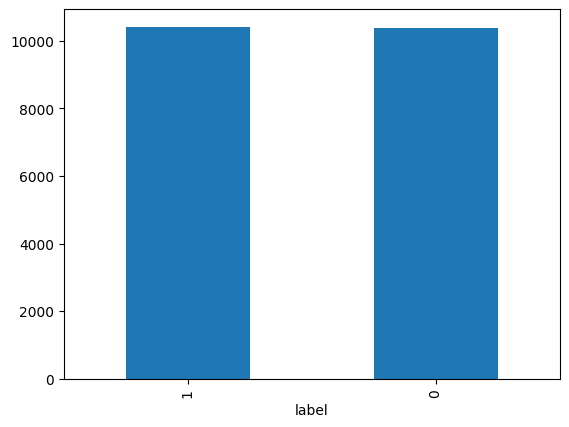

In [131]:
df['label'].value_counts().plot(kind='bar')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [133]:
df.shape

(20800, 5)

In [134]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [135]:
## Handled Missing Values by Dropping those rows
df= df.dropna()

In [136]:
df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [137]:
df.shape

(18285, 5)

In [138]:
df.reset_index(inplace=True)

In [139]:
df.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [140]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [141]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [142]:
df=df.drop(['id','text','author'],axis=1)

In [143]:
df.sample(10)

,index,title,label
243,280,Al Sharpton to Dems: No Point Appealing to ‘Ar...,0
5787,6605,George W. Bush’s Ethics Lawyer Files Complaint...,1
10768,12234,Clinton’s Allies Promise a Tougher Line on Iran,1
8496,9682,Dying CIA Agent Confirms the White House’s Upc...,1
5756,6572,Cheese shortage due to enlarged moon. More soon.,1
10291,11705,"North Korea, Far From Crazy, Is All Too Ration...",0
11562,13131,Trump at Nat’l Prayer Breakfast: Let’s Pray fo...,0
4523,5161,‘Weekend Warriors’ Show Survival Benefits - Th...,0
17904,20375,Women Suspected in Killing of Kim Jong-nam Are...,0
4620,5272,"‘Gambia Is Back Again,’ but Its New Leader Is ...",0


## Data Preprocessing

In [144]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [145]:
tag_re = re.compile(r'<[^>]+>')

def remove_tags(text):
    return tag_re.sub('',text) 

In [146]:
remove_tags(df['title'][0])

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [147]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [148]:
def preprocess_text(sen):

    # Step 1: Convert sentence to lower case:
    sentence = sen.lower()

    # Step 2: Remove all puntuations and symbols
    sentence = re.sub('[^a-z ]', ' ', sentence)

    # Step 3: Remove single charactersa after removal of punctuations
    sentence = re.sub(r"\s+[a-z]\s+", ' ', sentence)

    # Step 4: Remove extra space
    sentence = re.sub(r'\s+',' ',sentence)

    # Step 5: Remove stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence 

In [149]:
X = []
for i in df['title']:
    X.append(preprocess_text(i))


In [150]:
len(X)

18285

In [151]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [152]:
X[0]

'house dem aide even see comey letter jason chaffetz tweeted '

## Vectorization (Converting Text Data into the Vector)

In [153]:
tf = TfidfVectorizer()
x = tf.fit_transform(X).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [154]:
y = df['label']
y.sample(10)

14528    0
16434    0
7591     0
9430     1
17248    0
14008    0
10213    0
16032    1
6591     1
6799     1
Name: label, dtype: int64

## Splitting The Data into Train & Test

In [155]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10,stratify=y)

In [156]:
len(xtrain),len(ytrain)

(12799, 12799)

In [157]:
len(xtest),len(xtest)

(5486, 5486)

## Model Building

In [158]:
rf= RandomForestClassifier()
rf.fit(xtrain,ytrain) 

RandomForestClassifier()

## Model Evaluation

In [159]:
y_pred = rf.predict(xtest)
y_pred[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [160]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [161]:
accuracy_score_ = accuracy_score(ytest,y_pred)
accuracy_score_

0.9371126503827926

In [162]:
class Evaluation:
    
    def __init__(self,model,x_train,x_test,y_train,y_test):
        self.model = model
        self.xtrain = xtrain
        self.xtest = xtest
        self.ytrain = ytrain
        self.ytest = ytest
        
    def train_evaluation(self):
        y_pred_tr = self.model.predict(self.xtrain)
        
        acc_scr_tr = accuracy_score(self.ytrain,y_pred_tr)
        print("Accuracy Score On Training Data Set :",acc_scr_tr)
        print()
        
        con_mat_tr = confusion_matrix(self.ytrain,y_pred_tr)
        print("Confusion Matrix On Training Data Set :\n",con_mat_tr)
        print()
        
        class_rep_tr = classification_report(self.ytrain,y_pred_tr)
        print("Classification Report On Training Data Set :\n",class_rep_tr)
        
        
    def test_evaluation(self):
        y_pred_ts = self.model.predict(self.xtest)
        
        acc_scr_ts = accuracy_score(self.ytest,y_pred_ts)
        print("Accuracy Score On Testing Data Set :",acc_scr_ts)
        print()
        
        con_mat_ts = confusion_matrix(self.ytest,y_pred_ts)
        print("Confusion Matrix On Testing Data Set :\n",con_mat_ts)
        print()
        
        class_rep_ts = classification_report(self.ytest,y_pred_ts)
        print("Classification Report On Testing Data Set :\n",class_rep_ts)

In [163]:
# Checking Training Accuracy

Evaluation(rf,xtrain,xtest,ytrain,ytest).train_evaluation()

Accuracy Score On Training Data Set : 1.0

Confusion Matrix On Training Data Set :
 [[7252    0]
 [   0 5547]]

Classification Report On Training Data Set :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7252
           1       1.00      1.00      1.00      5547

    accuracy                           1.00     12799
   macro avg       1.00      1.00      1.00     12799
weighted avg       1.00      1.00      1.00     12799



In [164]:
# Checking Testing Accuracy

Evaluation(rf,xtrain,xtest,ytrain,ytest).test_evaluation()

Accuracy Score On Testing Data Set : 0.9371126503827926

Confusion Matrix On Testing Data Set :
 [[2825  284]
 [  61 2316]]

Classification Report On Testing Data Set :
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      3109
           1       0.89      0.97      0.93      2377

    accuracy                           0.94      5486
   macro avg       0.93      0.94      0.94      5486
weighted avg       0.94      0.94      0.94      5486



## Confusion Matrix on Predicted Data

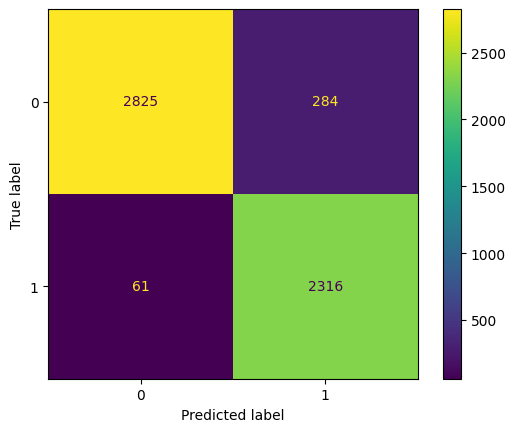

In [167]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,y_pred)
cfd = ConfusionMatrixDisplay(cf,display_labels=[0,1])
cfd.plot()

## Predicting New Data